<img src="logo.png" alt="Logo IFNMG" width="200">
<h1 style="text-align:center;">Empreendedorimos: Análise do Perfil Empreendedor no <br>IFNMG - <i>Campus</i> Montes Claros.</h1>
<p>Equipe: David Jansen, Eike Stálei, Iarah Almeida, Marianna Leandra e Roberta Rasoviti</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('perfilEmp.csv')
#Ajustes na tabela
# 1) Drop coluna 'Carimbo de data/hora'
df = df.drop(columns=['Carimbo de data/hora'])

df.head(10)

,Qual curso técnico você está fazendo?,Em qual ano do técnico você está?,Qual seu gênero?,Onde e com quem você mora atualmente?,Você possui renda pessoal?,Marque as características que considera possuir:,Um bom empreendimento é definido pelo sucesso rápido.,Você precisa ter um plano de negócios formal para começar uma empresa.,Só empreende quem tem ideias únicas.,"Para um novo empreendedor, não é necessário ter muito dinheiro.",Dividir suas ideias é importante para obter sucesso.,O empreendedor corre riscos sem planejamento.
0,Técnico em Informática,3º Ano,Mulher,"Em casa ou apartamento, com pais e/ou parentes.",Sim,Cautela para tomar decisões;Perfeccionista;Per...,Mito,Mito,Mito,Verdade,Verdade,Verdade
1,Técnico em Informática,3º Ano,Homem,"Em casa ou apartamento, com pais e/ou parentes.",Não,Cautela para tomar decisões;Persistência;Lider...,Mito,Verdade,Mito,Verdade,Verdade,Verdade
2,Técnico em Informática,3º Ano,Homem,"Em casa ou apartamento, com pais e/ou parentes.",Não,Visão para as oportunidades;Cautela para tomar...,Mito,Verdade,Mito,Verdade,Verdade,Verdade
3,Técnico em Informática,3º Ano,Homem,"Em casa ou apartamento, com pais e/ou parentes.",Não,Visão para as oportunidades,Mito,Mito,Mito,Verdade,Verdade,Verdade
4,Técnico em Informática,3º Ano,Homem,"Em casa ou apartamento, com pais e/ou parentes.",Não,Visão para as oportunidades;Cautela para tomar...,Mito,Mito,Mito,Mito,Verdade,Verdade
5,Técnico em Química,3º Ano,Mulher,"Em casa ou apartamento, com pais e/ou parentes.",Não,Visão para as oportunidades;Persistência;Compr...,Mito,Verdade,Mito,Verdade,Mito,Verdade
6,Técnico em Química,3º Ano,Mulher,"Em casa ou apartamento, com pais e/ou parentes.",Não,Cautela para tomar decisões;Perfeccionista,Mito,Verdade,Mito,Verdade,Mito,Verdade
7,Técnico em Química,3º Ano,Mulher,"Em casa ou apartamento, com pais e/ou parentes.",Não,Visão para as oportunidades;Persistência;Compr...,Mito,Verdade,Mito,Mito,Mito,Mito
8,Técnico em Química,3º Ano,Mulher,"Em casa ou apartamento, com pais e/ou parentes.",Não,Cautela para tomar decisões;Perfeccionista;Bus...,Mito,Mito,Mito,Mito,Verdade,Verdade
9,Técnico em Química,1º Ano,Homem,"Em casa ou apartamento, com pais e/ou parentes.",Não,Visão para as oportunidades;Cautela para tomar...,Mito,Verdade,Mito,Verdade,Verdade,Verdade


In [2]:
# 2) Mepear Curso
df['Qual curso técnico você está fazendo?'] = df['Qual curso técnico você está fazendo?'].map({
    'Técnico em Informática' : 1,
    'Técnico em Química' : 2
})

# 3) Mapear Ano
df['Em qual ano do técnico você está?'] = df['Em qual ano do técnico você está?'].map({
    '1º Ano' : 1,
    '2º Ano' : 2,
    '3º Ano' : 3,    
})

# 4) Mapear Gênero
df['Qual seu gênero?'] = df['Qual seu gênero?'].map({
    'Homem' : 1,
    'Mulher' : 2,
    'Outro' : 3
})

# 5) Mapear Moradia
df['Onde e com quem você mora atualmente?'] = df['Onde e com quem você mora atualmente?'].map({
    'Em casa ou apartamento, sozinho.' : 1,
    'Em casa ou apartamento, com pais e/ou parentes.' : 2,
    'Em casa ou apartamento, com cônjuge e/ou filhos.' : 3,
    'Em casa ou apartamento, com outras pessoas (incluindo república).' : 4,
    'Em alojamento universitário da própria instituição.' : 5,
    'Em outros tipos de habitação individual ou coletiva (hotel, hospedaria, pensão ou outro)' : 6
})

# 6) Mapear Renda Pessoal
df['Você possui renda pessoal?'] = df['Você possui renda pessoal?'].map({
    'Sim' : 1,
    'Não' : 2
})

# 7) Dividir Características e dropar coluna
aux = df['Marque as características que considera possuir:']
answers = list()
for index, row in df.iterrows():
    answers.append(aux[index].split(';')) # separando o conteúdo das respostas

df = df.drop(columns=['Marque as características que considera possuir:']) # apagar coluna antiga

# 8) Criar novas colunas para Características
names = ['Visão para as oportunidades', 
         'Cautela para tomar decisões', 
         'Perfeccionista', 
         'Persistência', 
         'Comprometimento', 
         'Busca por informações', 
         'Foco', 
         'Organização', 
         'Liderança', 
         'Autoconfiança'] 

base = 5
for i in range(len(names)):
    df.insert(i+base, names[i], 'temp')
    
# 9) Atualiar Características
for index, row in df.iterrows():
    for j in range (len(names)): 
        if (names[j] in answers[index]): # verifica se a caracteristica j foi marcada na resposta index
            df.loc[index, [names[j]]] = 1
        else :
            df.loc[index, [names[j]]] = 0
            
# 10) Mapear mitos e verdades
truth_myth = ['Um bom empreendimento é definido pelo sucesso rápido.', 
              'Você precisa ter um plano de negócios formal para começar uma empresa.', 
              'Só empreende quem tem ideias únicas.', 
              'Para um novo empreendedor, não é necessário ter muito dinheiro.', 
              'Dividir suas ideias é importante para obter sucesso.', 
              'O empreendedor corre riscos sem planejamento.'] #Eliminar a última


for i in range(len(truth_myth)):
    df[truth_myth[i]] = df[truth_myth[i]].map({
        'Mito' : 0,
        'Verdade' : 1
    })
    
df.head(10)

,Qual curso técnico você está fazendo?,Em qual ano do técnico você está?,Qual seu gênero?,Onde e com quem você mora atualmente?,Você possui renda pessoal?,Visão para as oportunidades,Cautela para tomar decisões,Perfeccionista,Persistência,Comprometimento,...,Foco,Organização,Liderança,Autoconfiança,Um bom empreendimento é definido pelo sucesso rápido.,Você precisa ter um plano de negócios formal para começar uma empresa.,Só empreende quem tem ideias únicas.,"Para um novo empreendedor, não é necessário ter muito dinheiro.",Dividir suas ideias é importante para obter sucesso.,O empreendedor corre riscos sem planejamento.
0,1,3,2,2,1,0,1,1,1,1,...,1,1,1,1,0,0,0,1,1,1
1,1,3,1,2,2,0,1,0,1,0,...,0,0,1,1,0,1,0,1,1,1
2,1,3,1,2,2,1,1,1,1,1,...,1,0,1,1,0,1,0,1,1,1
3,1,3,1,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,1,3,1,2,2,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,1
5,2,3,2,2,2,1,0,0,1,1,...,0,0,0,0,0,1,0,1,0,1
6,2,3,2,2,2,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,1
7,2,3,2,2,2,1,0,0,1,1,...,1,0,1,0,0,1,0,0,0,0
8,2,3,2,2,2,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,1
9,2,1,1,2,2,1,1,0,1,1,...,1,0,0,1,0,1,0,1,1,1


In [3]:
# Análise Exploratória
# 1) Separação em grupos de interesse
# 1.1) Separação por curso
tecInf = df.loc[df['Qual curso técnico você está fazendo?'] == 1]
tecQui = df.loc[df['Qual curso técnico você está fazendo?'] == 2]
# 1.2) Separação por ano de cada curso
tecInf1 = tecInf.loc[tecInf['Em qual ano do técnico você está?'] == 1]
tecInf2 = tecInf.loc[tecInf['Em qual ano do técnico você está?'] == 2]
tecInf3 = tecInf.loc[tecInf['Em qual ano do técnico você está?'] == 3]
tecQui1 = tecQui.loc[tecQui['Em qual ano do técnico você está?'] == 1]
tecQui2 = tecQui.loc[tecQui['Em qual ano do técnico você está?'] == 2]
tecQui3 = tecQui.loc[tecQui['Em qual ano do técnico você está?'] == 3]

# 1.3) Separação por renda pessoal
pRenda = df.loc[df['Você possui renda pessoal?'] == 1]
npRenda = df.loc[df['Você possui renda pessoal?'] == 2]

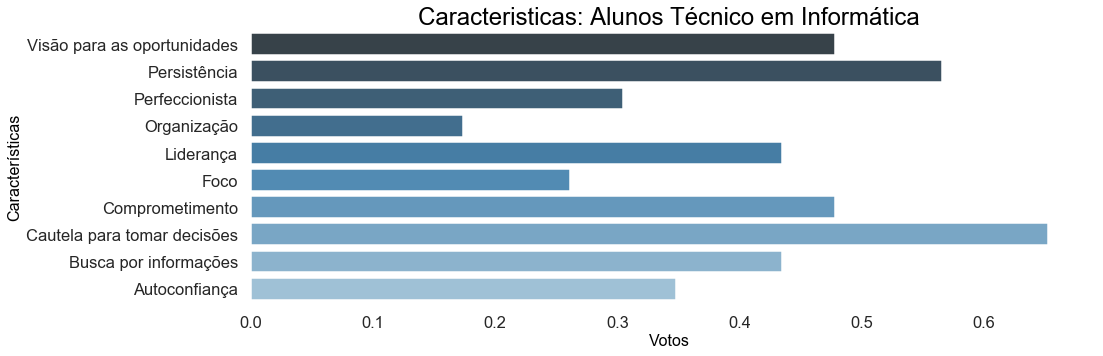

In [4]:
# 2) Gráficos de Características
# 2.1) Técnico Informática
count_caractetisticas = np.zeros(len(names))
for i in tecInf.index:
    for n in range(10):
        if(tecInf.loc[i][names[n]] == 1):
            count_caractetisticas[n] += 1  

for n in range(10):
    count_caractetisticas[n] = count_caractetisticas[n]/len(tecInf)
    
result = sorted(zip(names, count_caractetisticas), reverse=True)
# Criando dataframe com o resultado
dataf = pd.DataFrame(data=result)
dataf = dataf.rename(index=str, columns={0: "feature", 1: "importance"})

import matplotlib.pyplot as plt
#Configurações para exibição do gráfico
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(15,5))
g = sns.barplot(x="importance", y="feature", data=dataf, palette="Blues_d")
g.axes.set_title('Caracteristicas: Alunos Técnico em Informática', fontsize=24,color="black",alpha=2)
g.set_xlabel("Votos", size = 16,color="black")
g.set_ylabel("Características", size = 16,color="black")
sns.despine(left=True, bottom=True)

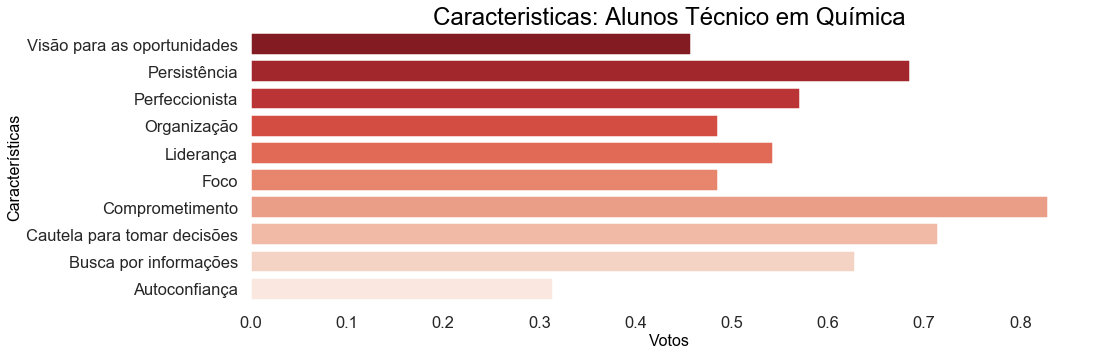

In [5]:
# 2) Gráficos de Características
# 2.2) Técnico Quimica
count_caractetisticas = np.zeros(len(names))
for i in tecQui.index:
    for n in range(10):
        if(tecQui.loc[i][names[n]] == 1):
            count_caractetisticas[n] += 1  

for n in range(10):
    count_caractetisticas[n] = count_caractetisticas[n]/len(tecQui)
    
result = sorted(zip(names, count_caractetisticas), reverse=True)
# Criando dataframe com o resultado
dataf = pd.DataFrame(data=result)
dataf = dataf.rename(index=str, columns={0: "feature", 1: "importance"})

import matplotlib.pyplot as plt
#Configurações para exibição do gráfico
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(15,5))
g = sns.barplot(x="importance", y="feature", data=dataf, palette="Reds_r")
g.axes.set_title('Caracteristicas: Alunos Técnico em Química', fontsize=24,color="black",alpha=2)
g.set_xlabel("Votos", size = 16,color="black")
g.set_ylabel("Características", size = 16,color="black")
sns.despine(left=True, bottom=True)

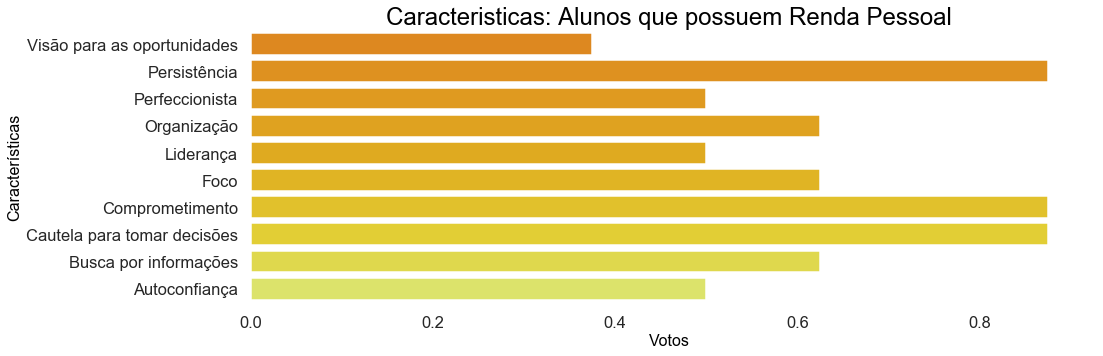

In [6]:
# 2) Gráficos de Características
# 2.3) Possui Renda Pessoal
count_caractetisticas = np.zeros(len(names))
for i in pRenda.index:
    for n in range(10):
        if(pRenda.loc[i][names[n]] == 1):
            count_caractetisticas[n] += 1  

for n in range(10):
    count_caractetisticas[n] = count_caractetisticas[n]/len(pRenda)
    
result = sorted(zip(names, count_caractetisticas), reverse=True)
# Criando dataframe com o resultado
dataf = pd.DataFrame(data=result)
dataf = dataf.rename(index=str, columns={0: "feature", 1: "importance"})

import matplotlib.pyplot as plt
#Configurações para exibição do gráfico
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(15,5))
g = sns.barplot(x="importance", y="feature", data=dataf, palette="Wistia_r")
g.axes.set_title('Caracteristicas: Alunos que possuem Renda Pessoal', fontsize=24,color="black",alpha=2)
g.set_xlabel("Votos", size = 16,color="black")
g.set_ylabel("Características", size = 16,color="black")
sns.despine(left=True, bottom=True)

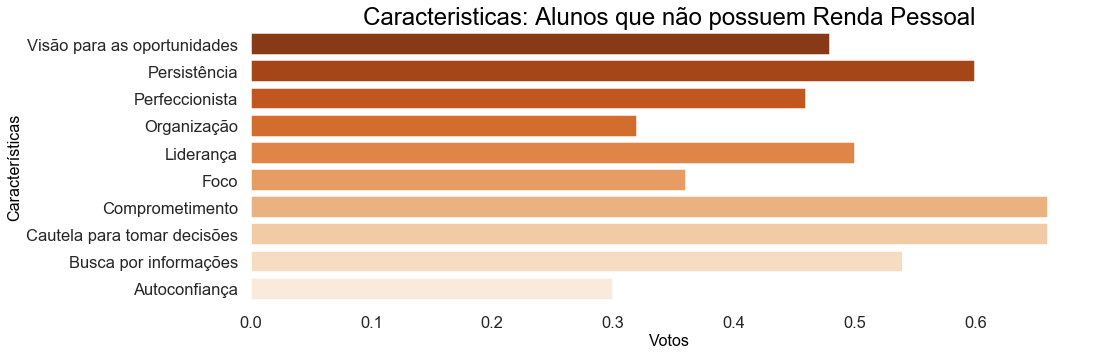

In [7]:
# 2) Gráficos de Características
# 2.4) Possui Renda Pessoal
count_caractetisticas = np.zeros(len(names))
for i in npRenda.index:
    for n in range(10):
        if(npRenda.loc[i][names[n]] == 1):
            count_caractetisticas[n] += 1  

for n in range(10):
    count_caractetisticas[n] = count_caractetisticas[n]/len(npRenda)
    
result = sorted(zip(names, count_caractetisticas), reverse=True)
# Criando dataframe com o resultado
dataf = pd.DataFrame(data=result)
dataf = dataf.rename(index=str, columns={0: "feature", 1: "importance"})

import matplotlib.pyplot as plt
#Configurações para exibição do gráfico
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(15,5))
g = sns.barplot(x="importance", y="feature", data=dataf, palette="Oranges_r")
g.axes.set_title('Caracteristicas: Alunos que não possuem Renda Pessoal', fontsize=24,color="black",alpha=2)
g.set_xlabel("Votos", size = 16,color="black")
g.set_ylabel("Características", size = 16,color="black")
sns.despine(left=True, bottom=True)

In [8]:
# 3) Acertos Mitos e Verdades
categoria_names = ['Técnico Informática 1º ano', 
                   'Técnico Informática 2º ano', 
                   'Técnico Informática 3º ano', 
                   'Técnico Química 1º ano', 
                   'Técnico Química 2º ano', 
                   'Técnico Química 3º ano', 
                   'Possui Renda Pessoal', 
                   'Não possui Renda Pessoal']
result_acertos = np.zeros((len(categoria_names), len(truth_myth)))

# 3.1) Acertos: Técnico em Informática 1 ano
count_acertos = np.zeros(len(truth_myth))
for i in tecInf1.index:
    if(tecInf1.loc[i][truth_myth[0]] == 0):
        count_acertos[0] += 1
    if(tecInf1.loc[i][truth_myth[1]] == 0):
        count_acertos[1] += 1
    if(tecInf1.loc[i][truth_myth[2]] == 0):
        count_acertos[2] += 1
    if(tecInf1.loc[i][truth_myth[3]] == 1):
        count_acertos[3] += 1
    if(tecInf1.loc[i][truth_myth[4]] == 1):
        count_acertos[4] += 1
    if(tecInf1.loc[i][truth_myth[5]] == 0):
        count_acertos[5] += 1       
for i in range(6):
    count_acertos[i] = count_acertos[i]/len(tecInf1)
result_acertos[0] = count_acertos

# 3.2) Acertos: Técnico em Informática 2 ano
count_acertos = np.zeros(len(truth_myth))
for i in tecInf2.index:
    if(tecInf2.loc[i][truth_myth[0]] == 0):
        count_acertos[0] += 1
    if(tecInf2.loc[i][truth_myth[1]] == 0):
        count_acertos[1] += 1
    if(tecInf2.loc[i][truth_myth[2]] == 0):
        count_acertos[2] += 1
    if(tecInf2.loc[i][truth_myth[3]] == 1):
        count_acertos[3] += 1
    if(tecInf2.loc[i][truth_myth[4]] == 1):
        count_acertos[4] += 1
    if(tecInf2.loc[i][truth_myth[5]] == 0):
        count_acertos[5] += 1
        
for i in range(6):
    count_acertos[i] = count_acertos[i]/len(tecInf2)
result_acertos[1] = count_acertos

# 3.3) Acertos: Técnico em Informática 3 ano
count_acertos = np.zeros(len(truth_myth))
for i in tecInf3.index:
    if(tecInf3.loc[i][truth_myth[0]] == 0):
        count_acertos[0] += 1
    if(tecInf3.loc[i][truth_myth[1]] == 0):
        count_acertos[1] += 1
    if(tecInf3.loc[i][truth_myth[2]] == 0):
        count_acertos[2] += 1
    if(tecInf3.loc[i][truth_myth[3]] == 1):
        count_acertos[3] += 1
    if(tecInf3.loc[i][truth_myth[4]] == 1):
        count_acertos[4] += 1
    if(tecInf3.loc[i][truth_myth[5]] == 0):
        count_acertos[5] += 1
        
for i in range(6):
    count_acertos[i] = count_acertos[i]/len(tecInf3)
result_acertos[2] = count_acertos

# 3.4) Acertos: Técnico em Quimica 1 ano
count_acertos = np.zeros(len(truth_myth))
for i in tecQui1.index:
    if(tecQui1.loc[i][truth_myth[0]] == 0):
        count_acertos[0] += 1
    if(tecQui1.loc[i][truth_myth[1]] == 0):
        count_acertos[1] += 1
    if(tecQui1.loc[i][truth_myth[2]] == 0):
        count_acertos[2] += 1
    if(tecQui1.loc[i][truth_myth[3]] == 1):
        count_acertos[3] += 1
    if(tecQui1.loc[i][truth_myth[4]] == 1):
        count_acertos[4] += 1
    if(tecQui1.loc[i][truth_myth[5]] == 0):
        count_acertos[5] += 1
        
for i in range(6):
    count_acertos[i] = count_acertos[i]/len(tecQui1)
result_acertos[3] = count_acertos

# 3.5) Acertos: Técnico em Quimica 2 ano
count_acertos = np.zeros(len(truth_myth))
for i in tecQui2.index:
    if(tecQui2.loc[i][truth_myth[0]] == 0):
        count_acertos[0] += 1
    if(tecQui2.loc[i][truth_myth[1]] == 0):
        count_acertos[1] += 1
    if(tecQui2.loc[i][truth_myth[2]] == 0):
        count_acertos[2] += 1
    if(tecQui2.loc[i][truth_myth[3]] == 1):
        count_acertos[3] += 1
    if(tecQui2.loc[i][truth_myth[4]] == 1):
        count_acertos[4] += 1
    if(tecQui2.loc[i][truth_myth[5]] == 0):
        count_acertos[5] += 1
        
for i in range(6):
    count_acertos[i] = count_acertos[i]/len(tecQui2)
result_acertos[4] = count_acertos

# 3.6) Acertos: Técnico em Quimica 3 ano
count_acertos = np.zeros(len(truth_myth))
for i in tecQui3.index:
    if(tecQui3.loc[i][truth_myth[0]] == 0):
        count_acertos[0] += 1
    if(tecQui3.loc[i][truth_myth[1]] == 0):
        count_acertos[1] += 1
    if(tecQui3.loc[i][truth_myth[2]] == 0):
        count_acertos[2] += 1
    if(tecQui3.loc[i][truth_myth[3]] == 1):
        count_acertos[3] += 1
    if(tecQui3.loc[i][truth_myth[4]] == 1):
        count_acertos[4] += 1
    if(tecQui3.loc[i][truth_myth[5]] == 0):
        count_acertos[5] += 1
        
for i in range(6):
    count_acertos[i] = count_acertos[i]/len(tecQui3)
result_acertos[5] = count_acertos

# 3.7) Acertos: Possui Renda
count_acertos = np.zeros(len(truth_myth))
for i in pRenda.index:
    if(pRenda.loc[i][truth_myth[0]] == 0):
        count_acertos[0] += 1
    if(pRenda.loc[i][truth_myth[1]] == 0):
        count_acertos[1] += 1
    if(pRenda.loc[i][truth_myth[2]] == 0):
        count_acertos[2] += 1
    if(pRenda.loc[i][truth_myth[3]] == 1):
        count_acertos[3] += 1
    if(pRenda.loc[i][truth_myth[4]] == 1):
        count_acertos[4] += 1
    if(pRenda.loc[i][truth_myth[5]] == 0):
        count_acertos[5] += 1
        
for i in range(6):
    count_acertos[i] = count_acertos[i]/len(pRenda)
result_acertos[6] = count_acertos

# 3.8) Acertos: Não possui Renda
count_acertos = np.zeros(len(truth_myth))
for i in npRenda.index:
    if(npRenda.loc[i][truth_myth[0]] == 0):
        count_acertos[0] += 1
    if(npRenda.loc[i][truth_myth[1]] == 0):
        count_acertos[1] += 1
    if(npRenda.loc[i][truth_myth[2]] == 0):
        count_acertos[2] += 1
    if(npRenda.loc[i][truth_myth[3]] == 1):
        count_acertos[3] += 1
    if(npRenda.loc[i][truth_myth[4]] == 1):
        count_acertos[4] += 1
    if(npRenda.loc[i][truth_myth[5]] == 0):
        count_acertos[5] += 1
        
for i in range(6):
    count_acertos[i] = count_acertos[i]/len(npRenda)
result_acertos[7] = count_acertos

<Figure size 1080x360 with 0 Axes>

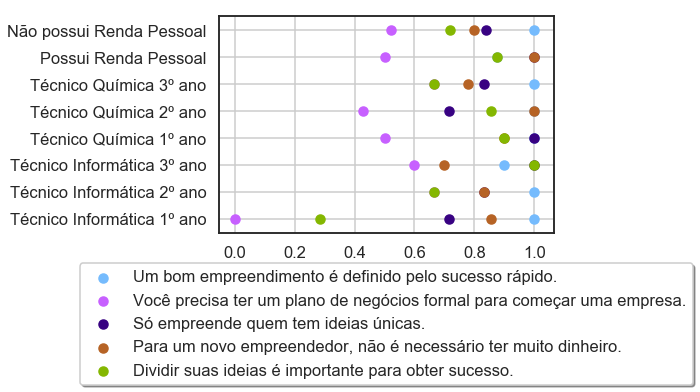

In [9]:
# 4) Gráficos: Acertos Mitos e Verdades
# 4.1) Um bom empreendimento é definido pelo sucesso rápido.
#sns.despine(f, left=True, bottom=True)
sns.set_context("talk")
sns.set_style("white")
plt.figure(figsize=(15,5))
fig, ax = plt.subplots()
colors = ['xkcd:sky blue', 'xkcd:bright lavender', 'xkcd:indigo', 'xkcd:copper', 'xkcd:dark lime']
for i in range(5):
    plt.scatter(result_acertos[:, i], categoria_names, color=colors[i], alpha=1.0, label=truth_myth[i])
    
ax.grid(True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          ncol=1, fancybox=True, shadow=True)
plt.show()

In [10]:
result_acertos[:,:-1]

array([[1.        , 0.        , 0.71428571, 0.85714286, 0.28571429],
       [1.        , 0.66666667, 0.83333333, 0.83333333, 0.66666667],
       [0.9       , 0.6       , 1.        , 0.7       , 1.        ],
       [1.        , 0.5       , 1.        , 0.9       , 0.9       ],
       [1.        , 0.42857143, 0.71428571, 1.        , 0.85714286],
       [1.        , 0.66666667, 0.83333333, 0.77777778, 0.66666667],
       [0.875     , 0.5       , 1.        , 1.        , 0.875     ],
       [1.        , 0.52      , 0.84      , 0.8       , 0.72      ]])

In [15]:
# Dimensão dos conjuntos:
print(len(tecInf))
print(len(tecInf1))
print(len(tecInf2))
print(len(tecInf3))
print(len(tecQui))
print(len(tecQui1))
print(len(tecQui2))
print(len(tecQui3))
print(len(pRenda))
print(len(npRenda))

23
7
6
10
35
10
7
18
8
50
